<a href="https://colab.research.google.com/github/arkB/DLFS2/blob/master/DLFS2_ch07.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 7章 RNNによる文章生成

## 7.1.1 RNN による文章生成手順

例として、 "you say goodbye and I say hello" というコーパスで学習したモデルに "I" を入れると確率的に "say" が選ばれたとします。その "say" を学習モデルに入れると確率的に "hello" が選ばれたとし…。

<img width="385.5" alt="キャプチャ.PNG (24.7 kB)" src="https://img.esa.io/uploads/production/attachments/8793/2019/08/17/31597/e7987a16-9710-4bb2-81e3-846f369ee5f1.PNG">

と以上のように文章生成します。

## 7.1.2 文章生成の実装

6章で実装した Rnnlm クラスをベースに文章生成を行う RnnlmGen クラスを追加し、その RnnlmGen クラスと各重みパラメータを用いて文章生成した結果が下記です。

それぞれ 1. ランダムな重みパラメータ、2. 前章の Rnnlm で学習した重みパラメータ、3. 前章の BetterRnnlm で学習した重みパラメータ という順番で生成された文章の精度が上がっているようになんとなく感じられます。

最後に BetterRnnlm で学習した重みパラメータに "the meaning of life is" という文字を与えた場合の結果も示します。





In [1]:
# Googleドライブのマウント
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# Googleドライブのパス設定
import sys
sys.path.append('/content/drive/"My Drive"/"Colab Notebooks"/data/DLFS2')
%cd /content/drive/"My Drive"/"Colab Notebooks"/data/DLFS2

/content/drive/My Drive/Colab Notebooks/data/DLFS2


In [0]:
# 6章の Rnnlm クラスのインポート
from common.functions import softmax
import numpy as np
from ch06.rnnlm import Rnnlm
from ch06.better_rnnlm import BetterRnnlm

In [0]:
# RnnlmGen クラス
class RnnlmGen(Rnnlm):
  def generate(self, start_id, skip_ids=None, sample_size=100):
    word_ids = [start_id]
    
    x = start_id
    while len(word_ids) < sample_size:
      x = np.array(x).reshape(1, 1)
      score = self.predict(x)
      p = softmax(score.flatten())
      
      sampled = np.random.choice(len(p), size=1, p=p)
      if (skip_ids is None) or (sampled not in skip_ids):
        x = sampled
        word_ids.append(int(x))
        
    return word_ids

In [5]:
# 1. ランダムな重みパラメータ
from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)

model = RnnlmGen()
# model.load_params('ch06/Rnnlm.pkl')

start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]

word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print(txt)

you milestones mainframes engaging panama consumed secret reunification irony veteran attack norway value happen crisis de crushed buckle pickup damages affairs merrill pleaded fragile mighty dashed maybe sagan justifies prosperity fire existing rapidly illuminating practicing president else graduates reportedly veterans instrumental liberal shifting beef influences roberts guilders daikin detailing subsidize colony silent rican goods negotiated tactics function marsh bigger einhorn notice kemper training clothes multibillion-dollar weiss spur fidelity indicate unload grower produces surged version max bureaucrats complex outer interfere nightmare meaning lotus township dorfman investment douglas curve cananea embarrassed noble turnover steam about maintain materials representing jeopardize horizon engines bronx


In [6]:
# 2. 6章 Rnnlm で学習済みの重みパラメータ
from dataset import ptb

corpus, word_to_id, id_to_word = ptb.load_data('train')
vocab_size = len(word_to_id)
corpus_size = len(corpus)

model = RnnlmGen()
model.load_params('ch06/Rnnlm.pkl')

start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]

word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print(txt)

you as not waste amr corp. and seen through reinforce hands.
 mr. jones is a job of next year.
 we caution is either that the analysis would be republican.
 hud can look interest within weeks.
 corp. is n't prepared to resign and messrs. gorbachev.
 the company boasts time building from lots of courtaulds said.
 mr. scott thinks they did n't top.
 basin stockholders took a major offer in campbell 's trustcorp handling before the merchant banking and federal various fraud court is unfairly the alleged president of the most tells interest data.



In [7]:
# 3. 改良後の BetterRnnlm で学習済みの重みパラメータ
from ch07.rnnlm_gen import BetterRnnlmGen
model.reset_state()
model = BetterRnnlmGen()
model.load_params('ch06/BetterRnnlm.pkl')

# start文字とskip文字の設定
start_word = 'you'
start_id = word_to_id[start_word]
skip_words = ['N', '<unk>', '$']
skip_ids = [word_to_id[w] for w in skip_words]
# 文章生成
word_ids = model.generate(start_id, skip_ids)
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')

print(txt)

you trust enough tools to serve the largest dollar he said.
 the bond market is convertible into a broad bag of so-called bad junk bond because of recent declines in interest rates by going to maintain the payment.
 there is any heavy gains in the junk bond market.
 certain institutions have a lot of tax risk now.
 the bankers ' recommendations which favor some fees to recent stock-market troubles in the face path like your major cool suggests in a source of financial opponents.
 a florida student said it is also worth much to bank


In [8]:
# Extra. 'the meaning of life is' で開始した場合
model.reset_state()

start_words = 'the meaning of life is'
start_ids = [word_to_id[w] for w in start_words.split(' ')]

for x in start_ids[:-1]:
    x = np.array(x).reshape(1, 1)
    model.predict(x)

word_ids = model.generate(start_ids[-1], skip_ids)
word_ids = start_ids[:-1] + word_ids
txt = ' '.join([id_to_word[i] for i in word_ids])
txt = txt.replace(' <eos>', '.\n')
print('-' * 50)
print(txt)

--------------------------------------------------
the meaning of life is the worst unlike a part of exchanges.
 in the u.s. carriers had pay for a year they needed because it had some hope of music.
 the recent uncertainty in the fed was in the takeover of europe securities by frankfurt when the official approved china the stock market 's.
 everybody had no credit dealings in their recent.
 over the past three years many investors believe that if there is n't anything wrong for an market and a federal reserve execute that interest rates do alone.
 as the next five-year downturn in financial markets many


## 7.2 seq2seq

ある時系列データを別の時系列データに変換するような問題として次のようなものが考えられます。

* 機械翻訳
* 音声認識
* チャットボット
* コンパイラによるソースコードの機械語変換

ここでは、ある時系列データを別の時系列データに変換する手法として **seq2seq**（sequence to sequence）という手法を見ていきます。

### 7.2.1 seq2seq の原理

日本語から英語への機械翻訳を例に取ると、「吾輩は猫である」を「I am a cat」に翻訳するケースでは図7-5のように Encoder と Decoder によって時系列データの変換が行われます。

<img width="386.25" alt="キャプチャ.PNG (10.2 kB)" src="https://img.esa.io/uploads/production/attachments/8793/2019/08/17/31597/ba4f3658-d50c-4da8-826b-936a643fe95e.PNG">

Encoder では RNN(LSTM) を利用し、時系列データを ${\bf h}$ という隠れ状態ベクトルに変換します。

<img width="371.25" alt="キャプチャa.PNG (14.2 kB)" src="https://img.esa.io/uploads/production/attachments/8793/2019/08/17/31597/3bc2f301-65f9-4fd0-b488-18f4cf39091f.PNG">

Decoder ではその ${\bf h}$ を受け取って前節の文章生成するモデルをそのまま利用します。全体像は下図7-9 です。

<img width="750.75" alt="キャプチャ.PNG (55.9 kB)" src="https://img.esa.io/uploads/production/attachments/8793/2019/08/17/31597/4d768db1-520a-49bd-8fbd-106a59cac0bf.PNG">

In [9]:
from dataset import sequence


(x_train, t_train), (x_test, t_test) = \
    sequence.load_data('addition.txt', seed=1984)
char_to_id, id_to_char = sequence.get_vocab()

print(x_train.shape, t_train.shape)
print(x_test.shape, t_test.shape)
# (45000, 7) (45000, 5)
# (5000, 7) (5000, 5)

print(x_train[0])
print(t_train[0])
# [ 3  0  2  0  0 11  5]
# [ 6  0 11  7  5]

print(''.join([id_to_char[c] for c in x_train[0]]))
print(''.join([id_to_char[c] for c in t_train[0]]))
# 71+118
# _189

(45000, 7) (45000, 5)
(5000, 7) (5000, 5)
[ 3  0  2  0  0 11  5]
[ 6  0 11  7  5]
71+118 
_189 


## 7.3 seq2seq の実装

Encoder クラスと Decoder クラスはそれぞれ下図のように実装します。

<img width="367.5" alt="キャプチャb.PNG (6.9 kB)" src="https://img.esa.io/uploads/production/attachments/8793/2019/08/17/31597/596334cd-90ca-4ad6-976c-a1b59fa8eb9b.PNG">

<img width="373.5" alt="キャプチャc.PNG (11.2 kB)" src="https://img.esa.io/uploads/production/attachments/8793/2019/08/17/31597/88141fb7-827b-4564-9fa1-53968b38fe08.PNG">

実際のコードは下記です。

In [0]:
from common.time_layers import *
from common.base_model import BaseModel


class Encoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')

        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=False)

        self.params = self.embed.params + self.lstm.params
        self.grads = self.embed.grads + self.lstm.grads
        self.hs = None

    def forward(self, xs):
        xs = self.embed.forward(xs)
        hs = self.lstm.forward(xs)
        self.hs = hs
        return hs[:, -1, :]

    def backward(self, dh):
        dhs = np.zeros_like(self.hs)
        dhs[:, -1, :] = dh

        dout = self.lstm.backward(dhs)
        dout = self.embed.backward(dout)
        return dout

In [0]:
class Decoder:
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        rn = np.random.randn

        embed_W = (rn(V, D) / 100).astype('f')
        lstm_Wx = (rn(D, 4 * H) / np.sqrt(D)).astype('f')
        lstm_Wh = (rn(H, 4 * H) / np.sqrt(H)).astype('f')
        lstm_b = np.zeros(4 * H).astype('f')
        affine_W = (rn(H, V) / np.sqrt(H)).astype('f')
        affine_b = np.zeros(V).astype('f')

        self.embed = TimeEmbedding(embed_W)
        self.lstm = TimeLSTM(lstm_Wx, lstm_Wh, lstm_b, stateful=True)
        self.affine = TimeAffine(affine_W, affine_b)

        self.params, self.grads = [], []
        for layer in (self.embed, self.lstm, self.affine):
            self.params += layer.params
            self.grads += layer.grads

    def forward(self, xs, h):
        self.lstm.set_state(h)

        out = self.embed.forward(xs)
        out = self.lstm.forward(out)
        score = self.affine.forward(out)
        return score

    def backward(self, dscore):
        dout = self.affine.backward(dscore)
        dout = self.lstm.backward(dout)
        dout = self.embed.backward(dout)
        dh = self.lstm.dh
        return dh

    def generate(self, h, start_id, sample_size):
        sampled = []
        sample_id = start_id
        self.lstm.set_state(h)

        for _ in range(sample_size):
            x = np.array(sample_id).reshape((1, 1))
            out = self.embed.forward(x)
            out = self.lstm.forward(out)
            score = self.affine.forward(out)

            sample_id = np.argmax(score.flatten())
            sampled.append(int(sample_id))

        return sampled

## 7.3.3 Seq2seq クラス

Seq2seq クラスの実装は Encoder クラスと Decoder クラスをつなぎ合わせて、Time softmax with Loss レイヤを使って損失を計算します。

コードは下記：

In [0]:
class Seq2seq(BaseModel):
    def __init__(self, vocab_size, wordvec_size, hidden_size):
        V, D, H = vocab_size, wordvec_size, hidden_size
        self.encoder = Encoder(V, D, H)
        self.decoder = Decoder(V, D, H)
        self.softmax = TimeSoftmaxWithLoss()

        self.params = self.encoder.params + self.decoder.params
        self.grads = self.encoder.grads + self.decoder.grads

    def forward(self, xs, ts):
        decoder_xs, decoder_ts = ts[:, :-1], ts[:, 1:]

        h = self.encoder.forward(xs)
        score = self.decoder.forward(decoder_xs, h)
        loss = self.softmax.forward(score, decoder_ts)
        return loss

    def backward(self, dout=1):
        dout = self.softmax.backward(dout)
        dh = self.decoder.backward(dout)
        dout = self.encoder.backward(dh)
        return dout

    def generate(self, xs, start_id, sample_size):
        h = self.encoder.forward(xs)
        sampled = self.decoder.generate(h, start_id, sample_size)
        return sampled

## 7.3.4-7.4.2 Seq2seq の評価およびその改良

下記コードにて Seq2seq クラスの評価4パターンについて実施しました。

||  隠れ状態${\bf h}$ の覗き見なし  | 隠れ状態${\bf h}$ の覗き見あり  |
| --- | ---- | ---- |
|入力データ反転なし|  Case 1  |  Case 4  |
|入力データ反転あり|  Case 2  |  Case 3  |

入力データ反転：

<img width="367.5" alt="キャプチャ.PNG (10.4 kB)" src="https://img.esa.io/uploads/production/attachments/8793/2019/08/17/31597/52ad9a09-bc6e-4069-99b3-f7adbba245ac.PNG">

隠れ状態${\bf h}$ の覗き見：

<img width="369" alt="キャプチャd.PNG (17.1 kB)" src="https://img.esa.io/uploads/production/attachments/8793/2019/08/17/31597/c2459851-4e53-4c9f-9f67-7d3f0f460aad.PNG">

各手法ごとの epochs-精度比較：

<img width="364.5" alt="キャプチャe.PNG (24.0 kB)" src="https://img.esa.io/uploads/production/attachments/8793/2019/08/17/31597/008fa9cf-1551-4de0-b493-42dc7fdd3a31.PNG">

具体的なコードは下記：

| epoch 1 |  iter 1 / 351 | time 0[s] | loss 2.56
| epoch 1 |  iter 21 / 351 | time 1[s] | loss 2.53
| epoch 1 |  iter 41 / 351 | time 2[s] | loss 2.17
| epoch 1 |  iter 61 / 351 | time 3[s] | loss 1.96
| epoch 1 |  iter 81 / 351 | time 4[s] | loss 1.92
| epoch 1 |  iter 101 / 351 | time 6[s] | loss 1.87
| epoch 1 |  iter 121 / 351 | time 7[s] | loss 1.85
| epoch 1 |  iter 141 / 351 | time 8[s] | loss 1.83
| epoch 1 |  iter 161 / 351 | time 9[s] | loss 1.79
| epoch 1 |  iter 181 / 351 | time 10[s] | loss 1.77
| epoch 1 |  iter 201 / 351 | time 12[s] | loss 1.77
| epoch 1 |  iter 221 / 351 | time 13[s] | loss 1.76
| epoch 1 |  iter 241 / 351 | time 14[s] | loss 1.76
| epoch 1 |  iter 261 / 351 | time 15[s] | loss 1.76
| epoch 1 |  iter 281 / 351 | time 16[s] | loss 1.75
| epoch 1 |  iter 301 / 351 | time 18[s] | loss 1.74
| epoch 1 |  iter 321 / 351 | time 19[s] | loss 1.75
| epoch 1 |  iter 341 / 351 | time 20[s] | loss 1.74
Q 77+85  
T 162 
☒ 100 
---
Q 975+164
T 1139
☒ 1000
---
Q 582

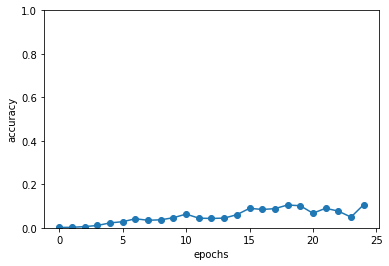

In [13]:
# Case 1

import numpy as np
import matplotlib.pyplot as plt
from dataset import sequence
from common.optimizer import Adam
from common.trainer import Trainer
from common.util import eval_seq2seq
from ch07.seq2seq import Seq2seq
from ch07.peeky_seq2seq import PeekySeq2seq


# データセットの読み込み
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

# Reverse input? =================================================
is_reverse = False  # True
if is_reverse:
    x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
# ================================================================

# ハイパーパラメータの設定
vocab_size = len(char_to_id)
wordvec_size = 16
hideen_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

# Normal or Peeky? ==============================================
model = Seq2seq(vocab_size, wordvec_size, hideen_size)
# model = PeekySeq2seq(vocab_size, wordvec_size, hideen_size)
# ================================================================
optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('val acc %.3f%%' % (acc * 100))

# グラフの描画
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.show()

| epoch 1 |  iter 1 / 351 | time 0[s] | loss 2.56
| epoch 1 |  iter 21 / 351 | time 1[s] | loss 2.52
| epoch 1 |  iter 41 / 351 | time 2[s] | loss 2.17
| epoch 1 |  iter 61 / 351 | time 3[s] | loss 1.96
| epoch 1 |  iter 81 / 351 | time 4[s] | loss 1.91
| epoch 1 |  iter 101 / 351 | time 5[s] | loss 1.87
| epoch 1 |  iter 121 / 351 | time 6[s] | loss 1.86
| epoch 1 |  iter 141 / 351 | time 8[s] | loss 1.84
| epoch 1 |  iter 161 / 351 | time 9[s] | loss 1.80
| epoch 1 |  iter 181 / 351 | time 10[s] | loss 1.78
| epoch 1 |  iter 201 / 351 | time 11[s] | loss 1.77
| epoch 1 |  iter 221 / 351 | time 12[s] | loss 1.77
| epoch 1 |  iter 241 / 351 | time 13[s] | loss 1.76
| epoch 1 |  iter 261 / 351 | time 15[s] | loss 1.75
| epoch 1 |  iter 281 / 351 | time 16[s] | loss 1.74
| epoch 1 |  iter 301 / 351 | time 17[s] | loss 1.74
| epoch 1 |  iter 321 / 351 | time 18[s] | loss 1.74
| epoch 1 |  iter 341 / 351 | time 19[s] | loss 1.73
Q 77+85  
T 162 
☒ 100 
---
Q 975+164
T 1139
☒ 1000
---
Q 582

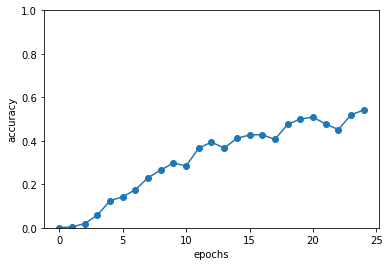

In [17]:
# Case 2

# データセットの読み込み
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

# Reverse input? =================================================
is_reverse = True
if is_reverse:
    x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
# ================================================================

# ハイパーパラメータの設定
vocab_size = len(char_to_id)
wordvec_size = 16
hideen_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

# Normal or Peeky? ==============================================
model = Seq2seq(vocab_size, wordvec_size, hideen_size)
# model = PeekySeq2seq(vocab_size, wordvec_size, hideen_size)
# ================================================================
optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('val acc %.3f%%' % (acc * 100))

# グラフの描画
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.show()

| epoch 1 |  iter 1 / 351 | time 0[s] | loss 2.57
| epoch 1 |  iter 21 / 351 | time 1[s] | loss 2.48
| epoch 1 |  iter 41 / 351 | time 2[s] | loss 2.20
| epoch 1 |  iter 61 / 351 | time 3[s] | loss 1.99
| epoch 1 |  iter 81 / 351 | time 4[s] | loss 1.89
| epoch 1 |  iter 101 / 351 | time 6[s] | loss 1.82
| epoch 1 |  iter 121 / 351 | time 7[s] | loss 1.82
| epoch 1 |  iter 141 / 351 | time 8[s] | loss 1.80
| epoch 1 |  iter 161 / 351 | time 9[s] | loss 1.79
| epoch 1 |  iter 181 / 351 | time 11[s] | loss 1.78
| epoch 1 |  iter 201 / 351 | time 12[s] | loss 1.77
| epoch 1 |  iter 221 / 351 | time 13[s] | loss 1.76
| epoch 1 |  iter 241 / 351 | time 15[s] | loss 1.76
| epoch 1 |  iter 261 / 351 | time 16[s] | loss 1.75
| epoch 1 |  iter 281 / 351 | time 17[s] | loss 1.74
| epoch 1 |  iter 301 / 351 | time 18[s] | loss 1.74
| epoch 1 |  iter 321 / 351 | time 20[s] | loss 1.73
| epoch 1 |  iter 341 / 351 | time 21[s] | loss 1.73
Q 77+85  
T 162 
☒ 100 
---
Q 975+164
T 1139
☒ 1013
---
Q 582

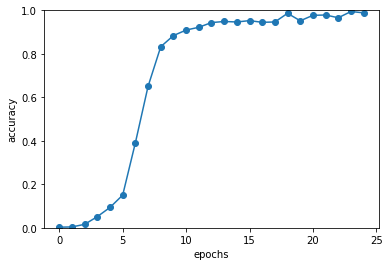

| epoch 1 |  iter 1 / 351 | time 0[s] | loss 2.57
| epoch 1 |  iter 21 / 351 | time 1[s] | loss 2.48
| epoch 1 |  iter 41 / 351 | time 2[s] | loss 2.18
| epoch 1 |  iter 61 / 351 | time 3[s] | loss 1.98
| epoch 1 |  iter 81 / 351 | time 5[s] | loss 1.86
| epoch 1 |  iter 101 / 351 | time 6[s] | loss 1.81
| epoch 1 |  iter 121 / 351 | time 7[s] | loss 1.80
| epoch 1 |  iter 141 / 351 | time 9[s] | loss 1.78
| epoch 1 |  iter 161 / 351 | time 10[s] | loss 1.77
| epoch 1 |  iter 181 / 351 | time 11[s] | loss 1.76
| epoch 1 |  iter 201 / 351 | time 13[s] | loss 1.76
| epoch 1 |  iter 221 / 351 | time 14[s] | loss 1.75
| epoch 1 |  iter 241 / 351 | time 15[s] | loss 1.75
| epoch 1 |  iter 261 / 351 | time 17[s] | loss 1.74
| epoch 1 |  iter 281 / 351 | time 18[s] | loss 1.73
| epoch 1 |  iter 301 / 351 | time 19[s] | loss 1.72
| epoch 1 |  iter 321 / 351 | time 21[s] | loss 1.72
| epoch 1 |  iter 341 / 351 | time 22[s] | loss 1.71
Q 77+85  
T 162 
☒ 100 
---
Q 975+164
T 1139
☒ 1000
---
Q 58

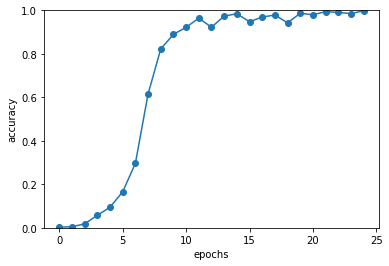

In [15]:
# Case 3

# データセットの読み込み
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

# Reverse input? =================================================
is_reverse = True
if is_reverse:
    x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
# ================================================================

# ハイパーパラメータの設定
vocab_size = len(char_to_id)
wordvec_size = 16
hideen_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

# Normal or Peeky? ==============================================
# データセットの読み込み
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

# Reverse input? =================================================
is_reverse = True
if is_reverse:
    x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
# ================================================================

# ハイパーパラメータの設定
vocab_size = len(char_to_id)
wordvec_size = 16
hideen_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

# Normal or Peeky? ==============================================
# model = Seq2seq(vocab_size, wordvec_size, hideen_size)
model = PeekySeq2seq(vocab_size, wordvec_size, hideen_size)
# ================================================================
optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('val acc %.3f%%' % (acc * 100))

# グラフの描画
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.show()
model = PeekySeq2seq(vocab_size, wordvec_size, hideen_size)
# ================================================================
optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('val acc %.3f%%' % (acc * 100))

# グラフの描画
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.show()

| epoch 1 |  iter 1 / 351 | time 0[s] | loss 2.57
| epoch 1 |  iter 21 / 351 | time 1[s] | loss 2.48
| epoch 1 |  iter 41 / 351 | time 2[s] | loss 2.20
| epoch 1 |  iter 61 / 351 | time 3[s] | loss 1.99
| epoch 1 |  iter 81 / 351 | time 5[s] | loss 1.89
| epoch 1 |  iter 101 / 351 | time 6[s] | loss 1.82
| epoch 1 |  iter 121 / 351 | time 7[s] | loss 1.82
| epoch 1 |  iter 141 / 351 | time 8[s] | loss 1.80
| epoch 1 |  iter 161 / 351 | time 10[s] | loss 1.79
| epoch 1 |  iter 181 / 351 | time 11[s] | loss 1.78
| epoch 1 |  iter 201 / 351 | time 12[s] | loss 1.77
| epoch 1 |  iter 221 / 351 | time 14[s] | loss 1.76
| epoch 1 |  iter 241 / 351 | time 15[s] | loss 1.76
| epoch 1 |  iter 261 / 351 | time 16[s] | loss 1.75
| epoch 1 |  iter 281 / 351 | time 18[s] | loss 1.74
| epoch 1 |  iter 301 / 351 | time 19[s] | loss 1.74
| epoch 1 |  iter 321 / 351 | time 20[s] | loss 1.73
| epoch 1 |  iter 341 / 351 | time 21[s] | loss 1.73
Q 77+85  
T 162 
☒ 100 
---
Q 975+164
T 1139
☒ 1013
---
Q 58

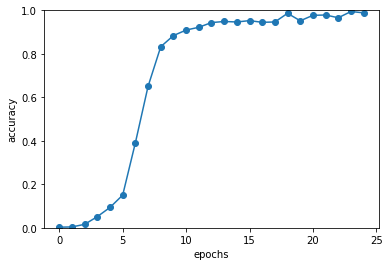

| epoch 1 |  iter 1 / 351 | time 0[s] | loss 2.57
| epoch 1 |  iter 21 / 351 | time 1[s] | loss 2.48
| epoch 1 |  iter 41 / 351 | time 2[s] | loss 2.18
| epoch 1 |  iter 61 / 351 | time 3[s] | loss 1.98
| epoch 1 |  iter 81 / 351 | time 5[s] | loss 1.86
| epoch 1 |  iter 101 / 351 | time 6[s] | loss 1.81
| epoch 1 |  iter 121 / 351 | time 7[s] | loss 1.80
| epoch 1 |  iter 141 / 351 | time 8[s] | loss 1.78
| epoch 1 |  iter 161 / 351 | time 10[s] | loss 1.77
| epoch 1 |  iter 181 / 351 | time 11[s] | loss 1.76
| epoch 1 |  iter 201 / 351 | time 12[s] | loss 1.76
| epoch 1 |  iter 221 / 351 | time 14[s] | loss 1.75
| epoch 1 |  iter 241 / 351 | time 15[s] | loss 1.75
| epoch 1 |  iter 261 / 351 | time 16[s] | loss 1.74
| epoch 1 |  iter 281 / 351 | time 18[s] | loss 1.73
| epoch 1 |  iter 301 / 351 | time 19[s] | loss 1.72
| epoch 1 |  iter 321 / 351 | time 20[s] | loss 1.72
| epoch 1 |  iter 341 / 351 | time 22[s] | loss 1.71
Q 77+85  
T 162 
☒ 100 
---
Q 975+164
T 1139
☒ 1000
---
Q 58

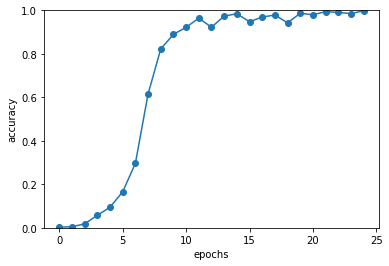

In [16]:
# Case 4

# データセットの読み込み
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

# Reverse input? =================================================
is_reverse = False
if is_reverse:
    x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
# ================================================================

# ハイパーパラメータの設定
vocab_size = len(char_to_id)
wordvec_size = 16
hideen_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

# Normal or Peeky? ==============================================
# データセットの読み込み
(x_train, t_train), (x_test, t_test) = sequence.load_data('addition.txt')
char_to_id, id_to_char = sequence.get_vocab()

# Reverse input? =================================================
is_reverse = True
if is_reverse:
    x_train, x_test = x_train[:, ::-1], x_test[:, ::-1]
# ================================================================

# ハイパーパラメータの設定
vocab_size = len(char_to_id)
wordvec_size = 16
hideen_size = 128
batch_size = 128
max_epoch = 25
max_grad = 5.0

# Normal or Peeky? ==============================================
# model = Seq2seq(vocab_size, wordvec_size, hideen_size)
model = PeekySeq2seq(vocab_size, wordvec_size, hideen_size)
# ================================================================
optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('val acc %.3f%%' % (acc * 100))

# グラフの描画
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.show()
model = PeekySeq2seq(vocab_size, wordvec_size, hideen_size)
# ================================================================
optimizer = Adam()
trainer = Trainer(model, optimizer)

acc_list = []
for epoch in range(max_epoch):
    trainer.fit(x_train, t_train, max_epoch=1,
                batch_size=batch_size, max_grad=max_grad)

    correct_num = 0
    for i in range(len(x_test)):
        question, correct = x_test[[i]], t_test[[i]]
        verbose = i < 10
        correct_num += eval_seq2seq(model, question, correct,
                                    id_to_char, verbose, is_reverse)

    acc = float(correct_num) / len(x_test)
    acc_list.append(acc)
    print('val acc %.3f%%' % (acc * 100))

# グラフの描画
x = np.arange(len(acc_list))
plt.plot(x, acc_list, marker='o')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.ylim(0, 1.0)
plt.show()

## seq2seq を用いたアプリケーション例

* 機械翻訳：「ある言語の文章」を「別の言語の文章」に変換する
* 自動要約：「ある長い文章」を「短い要約された文章」に変換する
* 質疑応答：「質問」を「答え」に変換する

例：

<img width="372.75" alt="キャプチャg.PNG (31.8 kB)" src="https://img.esa.io/uploads/production/attachments/8793/2019/08/17/31597/231e6d0d-7bf5-4265-a02c-29315ece5650.PNG">

* コードの機械語への翻訳（コンパイラ、インタープリタ）：

例：

<img width="369" alt="キャプチャk.PNG (20.6 kB)" src="https://img.esa.io/uploads/production/attachments/8793/2019/08/17/31597/f5d63045-a57e-4455-a3c1-2a5278833545.PNG">

* イメージキャプション：「画像」を「画像に映っているモノの説明文」に変換する

例（[im2txt](https://github.com/tensorflow/models/tree/master/research/im2txt)）：

<img width="370.5" alt="キャプチャl.PNG (167.3 kB)" src="https://img.esa.io/uploads/production/attachments/8793/2019/08/17/31597/a85eed94-c46b-4444-bb39-1fbd74b87527.PNG">

## 7.6 まとめ

本章では、前章までに構築してきた RNN を用いた言語モデルに文章生成機能を追加し、seq2seq という Encoder と Decoder を用いた手法で簡単な足し算問題を学習させました。また、seq2seq の改良するアイデアとして、Reverse と Peeky という2つを紹介しました。

seq2seq の応用として、機械翻訳やチャットボット、自動要約およびイメージキャプションのようなものに活用できる点紹介しました。

次章では、Attention というテクニックを紹介し、より良い seq2seq を実装していきます。